<a href="https://colab.research.google.com/github/Iyanuoluwa22/Sorting-IMBD_Reviews-using-Machine-Learning-and-Tensorflow/blob/main/(_Supervised)_Tensorflow_Natural_Language_Processing_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

### Getting Data

In [ ]:
(train_data,test_data),ds_info = tfds.load("imdb_reviews",
                                           split=['train[:80%]', 'test[20%:]'],
                                           as_supervised = True,
                                           with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHSCKA7/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHSCKA7/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHSCKA7/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### Preprocessing Data

In [ ]:
sample = train_data.take(4)
list(sample.as_numpy_iterator())

[(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
  0),
 (b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot deve

In [ ]:
train_data = tfds.as_numpy(train_data)
test_data = tfds.as_numpy(test_data)

In [ ]:
train_data = list(train_data)
test_data = list(test_data)

In [ ]:
train_data[0][0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
import pandas as pd
train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

In [ ]:
train_data_df.dtypes

0    object
1     int64
dtype: object

In [ ]:
# Getting data into variables
train_sentences = train_data_df[0].to_list()
train_labels = train_data_df[1].to_numpy()

# Same for Test Data
test_sentences = test_data_df[0].to_list()
test_labels = test_data_df[1].to_numpy()

In [ ]:
train_sentences[:5], train_labels[:5]

([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot developmen

In [ ]:
train_data_df = train_data_df.rename(columns = {0: "Review", 1: "Category"})
train_data_df

,Review,Category
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
...,...,...
19995,"b""The plot, character development, and gags in...",0
19996,"b""This is comedy as it once was and comparing ...",1
19997,"b""OK, I really don't have too much to say abou...",0
19998,"b""Although I rated this movie a 2 for showing ...",0


In [ ]:
ds_info.features["label"]

ClassLabel(shape=(), dtype=int64, num_classes=2)

In [ ]:
train_sentences = tf.strings.lower(train_sentences)
test_sentences = tf.strings.lower(test_sentences)

train_sentences = tf.strings.regex_replace(train_sentences, '<br />', ' ')
test_sentences = tf.strings.regex_replace(test_sentences, '<br />', ' ')

In [ ]:
train_sentences

<tf.Tensor: shape=(20000,), dtype=string, numpy=
array([b"this was an absolutely terrible movie. don't be lured in by christopher walken or michael ironside. both are great actors, but this must simply be their worst role in history. even their great acting could not redeem this movie's ridiculous storyline. this movie is an early nineties us propaganda piece. the most pathetic scenes were those when the columbian rebels were making their cases for revolutions. maria conchita alonso appeared phony, and her pseudo-love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. i am disappointed that there are movies like this, ruining actor's like christopher walken's good name. i could barely sit through it.",
       b'i have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. however on this occasion i fe

### Creating the model

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.6 MB/s eta 0:00:00


In [ ]:
# Getting pretrained token embeddings from tensorflow user hub
import tensorflow_hub as hub
text_embeddings = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                 input_shape=[], # shape of inputs coming to our model
                                 dtype=tf.string, # data type of inputs coming to the USE layer
                                 trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                 name="Universal_Sentence_Encoder")

In [ ]:
# Building the model using pre-trained models
token_inputs = tf.keras.Input(shape=[], dtype=tf.string, name="token_inputs")

# Creating the BERT section
pretrained_embedding = text_embeddings(token_inputs)
x = tf.keras.layers.Dropout(0.2)(pretrained_embedding)
# x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(x)
# Creating the model
model = tf.keras.Model(token_inputs,output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_inputs (InputLayer)   [(None,)]                 0         
                                                                 
 Universal_Sentence_Encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 classifier (Dense)          (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_______________

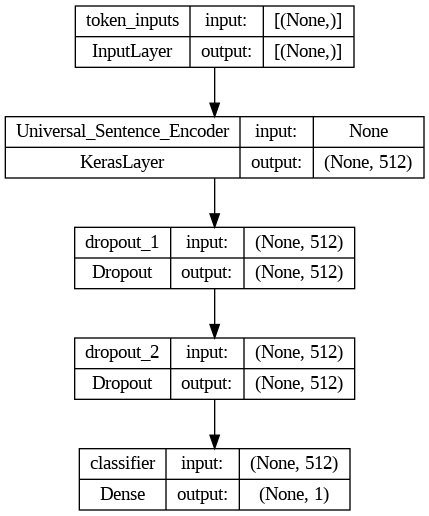

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = 'accuracy')

#### Data Pipeline

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

#### Fitting the model

In [ ]:
history = model.fit(train_dataset, epochs = 3, validation_data = test_dataset, validation_steps = 0.15*len(test_dataset))

Epoch 1/3
625/625 [==============================] - 52s 77ms/step - loss: 0.6099 - accuracy: 0.7712 - val_loss: 0.5497 - val_accuracy: 0.8112
Epoch 2/3
625/625 [==============================] - 43s 69ms/step - loss: 0.5081 - accuracy: 0.8167 - val_loss: 0.4812 - val_accuracy: 0.8251
Epoch 3/3
625/625 [==============================] - 43s 69ms/step - loss: 0.4587 - accuracy: 0.8262 - val_loss: 0.4425 - val_accuracy: 0.8328


####Fine-Tuning the model

In [ ]:
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping('val_loss',patience=3,mode='auto',restore_best_weights=True)
reduceLRCallback = tf.keras.callbacks.ReduceLROnPlateau('val_loss',factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
model.fit(train_dataset,epochs=12,initial_epoch=history.epoch[-1],
          callbacks = [earlyStoppingCallback,reduceLRCallback],
          validation_data = test_dataset, validation_steps = 0.15*len(test_dataset))

Epoch 3/12
625/625 [==============================] - 48s 76ms/step - loss: 0.4305 - accuracy: 0.8282 - val_loss: 0.4176 - val_accuracy: 0.8351 - lr: 0.0010
Epoch 4/12
625/625 [==============================] - 46s 74ms/step - loss: 0.4095 - accuracy: 0.8334 - val_loss: 0.4003 - val_accuracy: 0.8384 - lr: 0.0010
Epoch 5/12
625/625 [==============================] - 49s 79ms/step - loss: 0.3990 - accuracy: 0.8324 - val_loss: 0.3881 - val_accuracy: 0.8414 - lr: 0.0010
Epoch 6/12
625/625 [==============================] - 45s 71ms/step - loss: 0.3904 - accuracy: 0.8331 - val_loss: 0.3791 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 7/12
625/625 [==============================] - 44s 70ms/step - loss: 0.3818 - accuracy: 0.8345 - val_loss: 0.3720 - val_accuracy: 0.8491 - lr: 0.0010
Epoch 8/12
625/625 [==============================] - 48s 77ms/step - loss: 0.3793 - accuracy: 0.8338 - val_loss: 0.3665 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 9/12
625/625 [==============================] - 44s 

In [ ]:
model.evaluate(test_dataset)

625/625 [==============================] - 44s 70ms/step - loss: 0.3430 - accuracy: 0.8556


[0.3430096209049225, 0.8555999994277954]

In [ ]:
y_pred = model.predict(test_sentences)

625/625 [==============================] - 40s 63ms/step


In [ ]:
model_predictions = []
num = 0
for pred in y_pred:
  if(pred < 0.5): pred = 0
  else: pred = 1
  model_predictions.append(pred)

In [ ]:
test_labels[:10], model_predictions[:10]

(array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0]), [0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, model_predictions)

0.8556

## Notice how we were able to get better results because this is a Supervised Learning model as opposed to the Unsupervised model which was a disaster